## Introduction
Predicting customer car category preference using Multinomial Logistic Regression.
**Multinomial Logistic Regression**.

In [1]:
#  Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




## Load Dataset

In [ ]:
# Load the dataset
df = pd.read_csv(r'data\processed\Car_Sales_Clean.csv')
df.head()

,car_id,purchase_date,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,dealer_no,body_style,phone,dealer_region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


## Clean Column Names


In [7]:
# Clean column names for easier access
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('[$()]', '', regex=True)
df.columns

Index(['car_id', 'purchase_date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')

## Define Target 

In [9]:
# Define target variable
y = df['body_style']

# Select features for input
selected_cols = ['gender', 'annual_income', 'dealer_region', 'company', 'engine', 'transmission', 'price']
X = df[selected_cols]

## Encode Categorical Features

In [12]:
# Fix encoding issues in Engine column
df['engine'] = df['engine'].str.encode('latin1').str.decode('utf-8', errors='ignore')

# Select features
features = ['annual_income', 'company', 'model', 'transmission', 'color', 'price', 'dealer_region']
X = df[features]
y = df['body_style']

# One-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_cols = ['company', 'model', 'transmission', 'color', 'dealer_region']
X_encoded = encoder.fit_transform(X[categorical_cols])

# Combine with numerical features
import numpy as np
numerical_cols = ['annual_income', 'price']
X_num = X[numerical_cols].values

X_final = np.hstack((X_num, X_encoded))


## Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)


## Train the Logitstic Regression Model

In [14]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

c:\Users\ShaileshT\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ShaileshT\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

## Evaluate the Model


              precision    recall  f1-score   support

     Hardtop       0.48      0.28      0.35       594
   Hatchback       0.56      0.72      0.63      1226
   Passenger       0.75      0.47      0.58       789
         SUV       0.53      0.67      0.59      1275
       Sedan       0.70      0.60      0.65       898

    accuracy                           0.59      4782
   macro avg       0.60      0.55      0.56      4782
weighted avg       0.60      0.59      0.58      4782



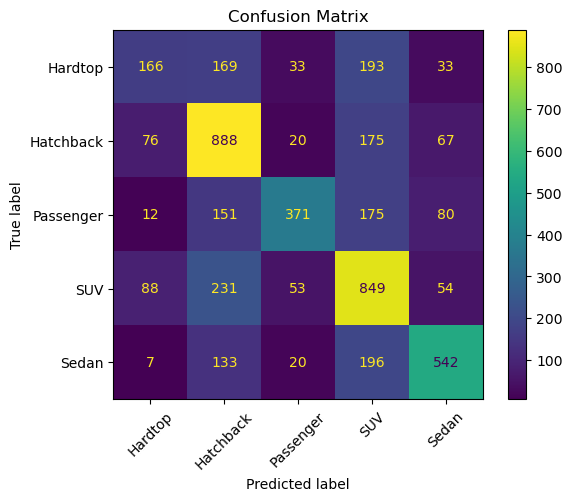

In [15]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

## Conclusion
### Best Predicted Category: Sedan
Precision: 0.70

Recall: 0.60

F1 Score: 0.65
        Meaning: The model correctly identified 60% of actual Sedan buyers with strong precision, making this the best-performing categroy overall.

### Weakest Category: Hardtop
Precision: 0.48

Recall: 0.28

F1 Score: 0.35
     Meaning: The model has difficulty correctly identifying Hardtop buyers and often confuses them with other categories.

### Other Classes:
Hatchback achieved a high recall of 0.72 and a solid F1 score of 0.63, indicating strong identification of buyers in this class.

Passenger cars had balanced performance with an F1 score of 0.58, though some class overlap is still present.

SUV predictions were also reliable with an F1 score of 0.59 and a good balance between precision and recall.


### Overall Performance:
Accuracy: 59%

Macro F1 Score: 0.56

Weighted F1 Score: 0.58

     Conclusion: The model demonstrates strong classification ability across muliple car categories and shows potential for business use cases such as customer profiling, inventory tagging and targeted marketing strategies. 